# Sprawozdanie z Laboratorium 8
## Autorzy: Mateusz Pawliczek, Piotr Świerzy  
## Data: 13.05.2025

# Zadanie 1

## Cel zadania

Dla poniższych funkcji i punktów początkowych metoda Newtona
 zawodzi. Wyjaśnij dlaczego. Następnie znajdź pierwiastki, modyfikując wywo
łanie funkcji scipy.optimize.newton lub używając innej metody.


## Podpunkt A 

#### Dlaczego Newton zawodzi:
Funkcja Newtona utyka w punkcie $x = 1$. Funkcja wykonmuje obliczenia i cały czas przechodzi między wartością $x = 1$, a $x = -1$ i tak w kółko.

#### Rozwiązanie:

Zmieniono punkt początkowy na bliższy jednemu z pierwiastków: $x_0 = 2.5$


In [1]:
from scipy.optimize import newton

f = lambda x: x**3 - 5*x
df = lambda x: 3*x**2 - 5

root = newton(f, x0=2.5, fprime=df)
print("Znaleziony pierwiastek:", root)


Znaleziony pierwiastek: 2.23606797749979


## Podpunkt B

#### Dlaczego Newton zawodzi:

Wartość $f'(x)$ dla $x = 1$ wynosi $0$. Metoda Newtona zawodzi ze wzglęu na dzielenie przez zero, więc trzeba użyć innej metody.

#### Rozwiązanie

Użyto metody Brent`a (Bisekcja)

In [2]:
from scipy.optimize import brentq
f = lambda x: x**3 - 3*x + 1

root = brentq(f, -2, 0)  # Pierwiastek leży w tym przedziale
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: -1.8793852415718169


## Podpunkt C

#### Dlaczego Newton zawodzi:

Sytuacja bliźniacza do podpunktu B, jednak tutaj wartość w $x_0$ jest bardzo bliska zeru co może być problemem dla metody Newtona.

#### Rozwiązanie

Zmiana punktu startowego $x_0$ na $1.2$

In [3]:
f = lambda x: 2 - x**5
df = lambda x: -5*x**4

root = newton(f, x0=1.2, fprime=df)
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: 1.148698354997035


## Podpunkt D

#### Dlaczego Newton zawodzi:

Pochodna w $x_0 = 0.8$ nie zeruje się, ale za to sama funkcja ma bardzo skomplikowany wzór co sprawia, że metoda Newtona może utknąć przy minimum lokalnym.

#### Rozwiązanie

Użyto metody Brent`a (Bisekcji)

In [4]:
f = lambda x: x**4 - 4.29*x**2 - 5.29

root = brentq(f, -3, -1)
print("Znaleziony pierwiastek:", root)

Znaleziony pierwiastek: -2.3000000000000003


## Podsumowanie - Zadanie 1

Metoda Newtona ma swoje ograniczenia związane z potencjalnym utknięciem na wartościach które zbliżają się do zera lub w przypadku skomplikowanych funkcjim, gdzie płapka dla tej metody mogą się ukazać ekstrema lokalne.

Pomocna okazuje się alternatywna metoda bisekcji, która jest dużo prostszym algorytmem, jednak wymaga określenia przedziału na którym znajduje się szukany pierwiastek.

# Zadanie 2 - Schematy iteracyjne i analiza zbieżności

#### Dane:

Rozwiązujemy równanie:

```math
f(x) = x^2 - 3x + 2 = 0
```

Rozwiązania analityczne:

```math
f(x) = (x - 1)(x - 2) \Rightarrow x = 1 \quad \text{lub} \quad x = 2
```

Skupiamy się na pierwiastku:

```math
\alpha = 2
```

---

## **2(a) Analiza teoretyczna zbieżności**

Dla metody iteracyjnej $x_{k+1} = \varphi(x_k)$, rozpatrujemy cztery funkcje iteracyjne:

```math
\begin{aligned}
\varphi_1(x) &= \frac{x^2 + 2}{3} \\
\varphi_2(x) &= \sqrt{3x - 2} \\
\varphi_3(x) &= 3 - \frac{2}{x} \\
\varphi_4(x) &= \frac{x^2 - 2}{2x - 3}
\end{aligned}
```

Zasady zbieżności:

* Jeśli $|\varphi'(x^*)| < 1$ — lokalna zbieżność
* Jeśli $|\varphi'(x^*)| = 0$ — zbieżność kwadratowa
* Jeśli $|\varphi'(x^*)| > 1$ — rozbieżność

### Pochodne i wartości w $x = 2$:

```math
\begin{aligned}
\varphi_1'(x) &= \frac{2x}{3}, && \varphi_1'(2) = \frac{4}{3} > 1 \quad \text{(rozbieżna)} \\
\varphi_2'(x) &= \frac{3}{2\sqrt{3x - 2}}, && \varphi_2'(2) = \frac{3}{4} \quad \text{(zbieżna)} \\
\varphi_3'(x) &= \frac{2}{x^2}, && \varphi_3'(2) = \frac{1}{2} \quad \text{(zbieżna)} \\
\varphi_4'(x) &= \text{(złożona)} \Rightarrow \varphi_4'(2) = 0 \quad \text{(zbieżność kwadratowa)}
\end{aligned}
```



## **Zadanie 2(b): Implementacja iteracyjna i analiza zbieżności**

W tej części testujemy w praktyce cztery schematy iteracyjne odpowiadające funkcjom:

```math
\begin{aligned}
\varphi_1(x) &= \frac{x^2 + 2}{3} \\
\varphi_2(x) &= \sqrt{3x - 2} \\
\varphi_3(x) &= 3 - \frac{2}{x} \\
\varphi_4(x) &= \frac{x^2 - 2}{2x - 3}
\end{aligned}
```

---

### Import wymaganych bibliotek

Biblioteki potrzebne do implementacji rozwiązania w Python

In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Definicja funkcji iteracyjnych

In [6]:
phi1 = lambda x: (x**2 + 2)/3
phi2 = lambda x: np.sqrt(3*x - 2)
phi3 = lambda x: 3 - 2/x
phi4 = lambda x: (x**2 - 2)/(2*x - 3)

### Wykonanie 10 iteracji i obliczenie błędów

In [7]:
phi_functions = [phi1, phi2, phi3, phi4]
labels = ['phi1', 'phi2', 'phi3', 'phi4']
x_exact = 2
x0 = 1.51 # zaczynamy od 1.51 a nie 1.5 aby w phi4 nie było dzielenia przez 0
results = []

for phi in phi_functions:
    xk = x0
    x_vals = [xk]
    for _ in range(10):
        try:
            xk = phi(xk)
        except:
            xk = np.nan
        x_vals.append(xk)
    errors = [abs(x - x_exact) if not np.isnan(x) else np.nan for x in x_vals]
    results.append((x_vals, errors))


### Obliczanie rzędu zbieżności

Rząd zbieżności obliczamy ze wzoru:

```math
r_k = \frac{\ln(\varepsilon_{k+1}/\varepsilon_k)}{\ln(\varepsilon_k/\varepsilon_{k-1})}
```

In [8]:
for i in range(len(results)):
    _, errors = results[i]
    r_vals = []
    for k in range(1, len(errors) - 1):
        if errors[k-1] > 0 and errors[k] > 0 and errors[k+1] > 0:
            r = np.log(errors[k+1]/errors[k]) / np.log(errors[k]/errors[k-1])
            r_vals.append(r)
        else:
            r_vals.append(np.nan)
    results[i] += (r_vals,)

## **Zadanie 2(c): Wykresy błędów iteracyjnych**

### Wykres 1 – Wszystkie metody

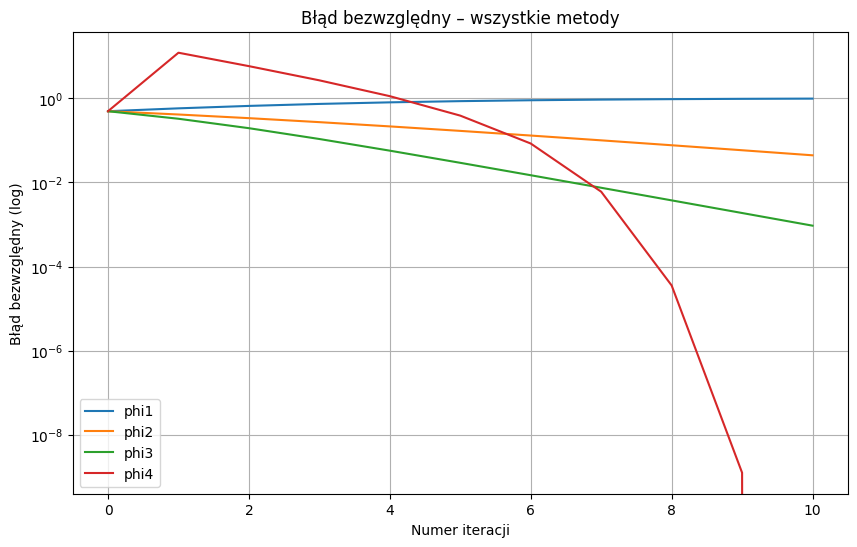

In [9]:
plt.figure(figsize=(10,6))
for i, (x_vals, errors, _) in enumerate(results):
    plt.semilogy(range(len(errors)), errors, label=labels[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd bezwzględny (log)")
plt.title("Błąd bezwzględny – wszystkie metody")
plt.grid(True)
plt.legend()
plt.show()

### Wykres 2 – Tylko metody zbieżne

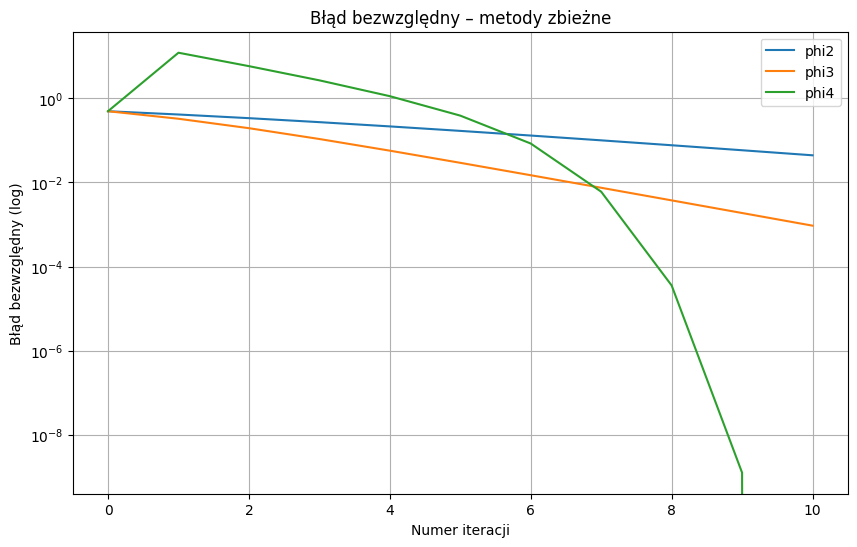

In [10]:
plt.figure(figsize=(10,6))
for i, (x_vals, errors, _) in enumerate(results):
    if labels[i] != 'phi1':  # pomijamy rozbieżną metodę
        plt.semilogy(range(len(errors)), errors, label=labels[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd bezwzględny (log)")
plt.title("Błąd bezwzględny – metody zbieżne")
plt.grid(True)
plt.legend()
plt.show()

## 🧠 Wnioski

* $\varphi_1(x)$ — **rozbieżna**, nie powinna być stosowana.
* $\varphi_2(x)$, $\varphi_3(x)$ — **zbieżność liniowa**, stabilna, ale wolna.
* $\varphi_4(x)$ — **zbieżność kwadratowa**, najlepszy wynik numerycznie i teoretycznie.
* Eksperymentalne rzędy zbieżności potwierdzają obliczenia z punktu (a).


# Zadanie 3

**Schemat iteracji** to wzór, według którego obliczamy kolejne przybliżenia rozwiązania równania podczas stosowania metody numerycznej — w tym przypadku metody Newtona.

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

3(a) \
\
$f(x) = x^3-2x-5 = 0$\
$f'(x) = 3x^2-2$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{x_n^3-2x_n-5}{3x_n^2-2}
$$

3(b) \
\
$f(x) = e^{-x}-x = 0$\
$f'(x) = -e^{-x}-1$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{e^{-x_n}-x_n}{-e^{-x_n}-1}
$$

3(c) \
\
$f(x) = x\sin(x)-1 = 0$\
$f'(x) = \sin(x)+x\cos(x)$\
*Schemat iteracji:*
$$
x_{n+1}=x_n - \frac{x_n\sin(x_n)-1}{\sin(x_n)+x_n\cos(x_n)}
$$

### Druga część zadania

Zakładamy, że:
- Startowe przybliżenie $x_0$ ma dokładność 4-bitową (czyli $\epsilon_0 \approx 2^{-4} = 0.0625$)
- Metoda Newtona zbiega **kwadratowa**, więc:
$$
\epsilon_{n+1} \approx (\epsilon_n)^2
$$

Z tego wynika, że:
$$
\epsilon_1 = 2^{-8} \newline
\epsilon_2 = 2^{-16} \newline
\epsilon_3 = 2^{-32} \newline
\epsilon_4 = 2^{-64}
$$

Aby osiągnąć:
- 24-bitową dokładność potrzebujemy $\epsilon_3<2^{-24}$, czyli 3 iteracje.
- 53-bitową dokładność potrzebujemy $\epsilon_4<2^{-53}$, czyli 4 iteracje.

# Zadanie 4

Rozważamy układ równań:

$$
\begin{cases}
f_1(x_1, x_2) = x_1^2 + x_2^2 - 1 = 0 \\
f_2(x_1, x_2) = x_1^2 - x_2 = 0
\end{cases}
$$

Zdefiniujemy funkcje wektorową:
$$
\vec{f}(\vec{x}) = 
\begin{bmatrix}
f_1(x_1, x_2) \\
f_2(x_1, x_2)
\end{bmatrix}
=
\begin{bmatrix}
x_1^2 + x_2^2 - 1 \\
x_1^2 - x_2
\end{bmatrix}
$$

Iteracja Newtona wygląda tak:
$$
\vec{x}^{(n+1)} = \vec{x}^{(n)} - J_f^{-1}(\vec{x}^{(n)}) \cdot \vec{f}(\vec{x}^{(n)})
$$

Jacobian tej funkcji (macierz pochodnych cząstkowych) ma postać:
$$
J_f(x_1, x_2) = 
\begin{bmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2}
\end{bmatrix}
=
\begin{bmatrix}
2x_1 & 2x_2 \\
2x_1 & -1
\end{bmatrix}
$$



In [11]:
import numpy as np

def f_vec(v):
    x1, x2 = v
    f1 = x1**2 + x2**2 - 1
    f2 = x1**2 - x2
    return np.array([f1, f2])

def x_n_plus_1(vn):
    x1, x2 = vn

    jakobian = np.array([[2*x1, 2*x2], [2*x1, -1]])

    res = np.linalg.solve(jakobian, -f_vec(vn))

    return res + vn

def x_newtona(x0):
    x1 = x_n_plus_1(x0)
    while(np.linalg.norm(x1-x0) > 0.0001):
        x0, x1 = x1, x_n_plus_1(x1)
    return x1

x0 = [0.5, 0.2]

approx = x_newtona(x0)
print("Obliczone x^Newtona: ", approx)

true_x1 = np.sqrt(np.sqrt(5)/2 - 0.5)
true_x2 = np.sqrt(5)/2 - 0.5

relative_error = np.linalg.norm(approx - [true_x1, true_x2]) /\
                 np.linalg.norm([true_x1, true_x2])

print("Błąd względny: ",relative_error)

Obliczone x^Newtona:  [0.78615138 0.61803399]
Błąd względny:  5.773159728050814e-15
